<a href="https://colab.research.google.com/github/piercepatrick/Data-Science-Masters-Program-Tuition/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
warnings. simplefilter(action='ignore', category=Warning)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [3]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
df = pd.read_csv('/content/drive/My Drive/DS/Data Masters Programs/masters_final_df.csv')
df.head()

,Unnamed: 0,university_name,program_name,tags,duration,tuition,start_date,description,state,city,world_ranking,disciplines,delivered,gpa,gre,toefl,ielts,credits,gpa_yn,university_tier_ranking,gmat_yn,ielts_yn,toefl_yn,gre_yn,fall_start_yn,spring_start_yn,summer_start_yn,desc_len,tuition_per_month
0,0,University of Rochester,Data Science,M.Sc.,12.0,1784.0,8/25/2021,goergen institute data science offers stem acc...,New York,Rochester,125.0,Data Science & Big Data,On Campus,NaN,Required,105.0,7.0,30.0,0,2,0,1,1,1,1,0,0,134,148.67
1,1,Bellevue University,Data Science,M.Sc.,24.0,585.0,3/9/2021,data science program bellevue university desig...,Nebraska,Bellevue,NaN,Data Science & Big Data,Online,3.0,Not Required,71.0,0.0,30.0,1,5,0,1,1,0,0,1,0,127,24.38
2,2,New York University,Data Science,M.Sc.,24.0,22272.0,9/2/2021,master science data science new york universit...,New York,New York City,28.0,Data Science & Big Data,On Campus,NaN,Required,105.0,7.0,36.0,0,1,0,1,1,1,1,0,0,199,928.00
3,3,Lipscomb University,Data Science,Master,12.0,1288.0,8/19/2020,data science program offered lipscomb universi...,Tennessee,Memphis,NaN,Informatics & Information Sciences,On Campus,NaN,Not Required,71.0,0.0,30.0,0,5,0,1,1,0,1,0,0,128,107.33
4,4,University of Massachusetts Dartmouth,Data Science,M.Sc.,12.0,22183.0,4/15/2021,data science program university massachusetts ...,New York,New York City,191.0,Data Science & Big Data,On Campus,3.0,Required,100.0,7.5,30.0,1,2,0,1,1,1,0,1,0,228,1848.58


In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

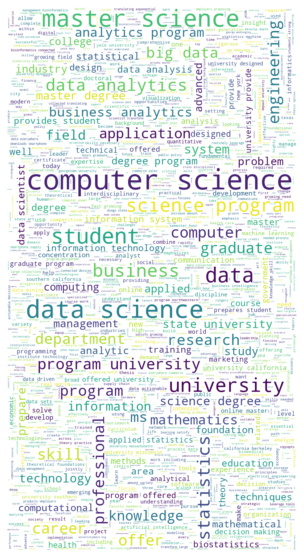

In [6]:
words = " ".join(df['description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[15,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [7]:
df.columns

Index(['university_name', 'program_name', 'tags', 'duration', 'tuition',
       'start_date', 'description', 'state', 'city', 'world_ranking',
       'disciplines', 'delivered', 'gpa', 'gre', 'toefl', 'ielts', 'credits',
       'gpa_yn', 'university_tier_ranking', 'gmat_yn', 'ielts_yn', 'toefl_yn',
       'gre_yn', 'fall_start_yn', 'spring_start_yn', 'summer_start_yn',
       'desc_len', 'tuition_per_month'],
      dtype='object')

In [8]:
df.describe()

,duration,tuition,world_ranking,gpa,toefl,ielts,credits,gpa_yn,university_tier_ranking,gmat_yn,ielts_yn,toefl_yn,gre_yn,fall_start_yn,spring_start_yn,summer_start_yn,desc_len,tuition_per_month
count,374.000000,374.00000,273.000000,190.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.0,374.0,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,17.419786,17988.52139,285.040293,2.970000,77.200535,5.905080,34.835125,0.508021,3.144385,0.122995,1.0,1.0,0.350267,0.652406,0.152406,0.026738,199.981283,1204.811979
std,6.429884,18232.59112,313.444728,0.169952,26.448086,2.079441,10.415293,0.500605,1.482881,0.328871,0.0,0.0,0.477693,0.476844,0.359896,0.161533,59.890447,1383.882142
min,3.000000,319.00000,1.000000,2.000000,0.000000,0.000000,10.000000,0.000000,1.000000,0.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,50.000000,13.290000
25%,12.000000,1288.00000,47.000000,3.000000,79.000000,6.500000,30.000000,0.000000,2.000000,0.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,155.000000,85.112500
50%,12.000000,14362.50000,161.000000,3.000000,80.000000,6.500000,33.000000,1.000000,3.000000,0.000000,1.0,1.0,0.000000,1.000000,0.000000,0.000000,198.000000,857.125000
75%,24.000000,27913.50000,421.000000,3.000000,90.000000,7.000000,34.835125,1.000000,5.000000,0.000000,1.0,1.0,1.000000,1.000000,0.000000,0.000000,241.000000,1824.435000
max,36.000000,81378.00000,1221.000000,3.500000,120.000000,7.500000,128.000000,1.000000,5.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,337.000000,6766.000000


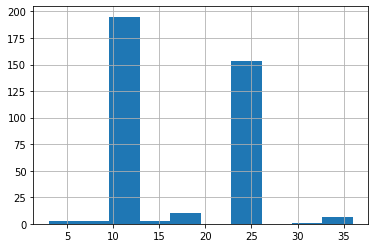

In [9]:
df.duration.hist()

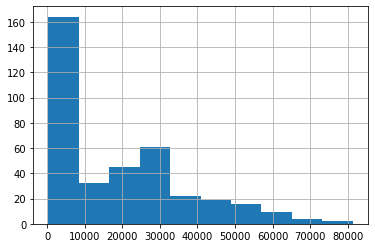

In [10]:
df.tuition.hist()

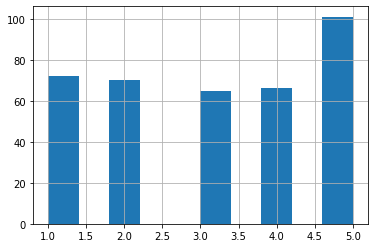

In [11]:
df.university_tier_ranking.hist()

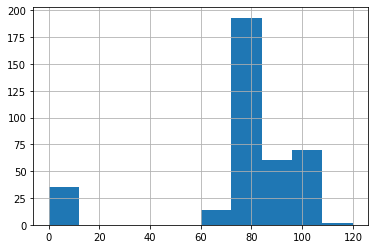

In [12]:
df.toefl.hist()

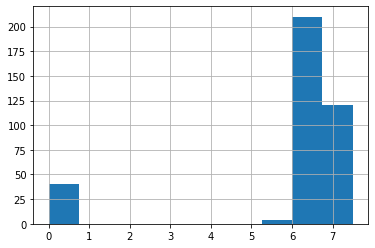

In [13]:
df.ielts.hist()

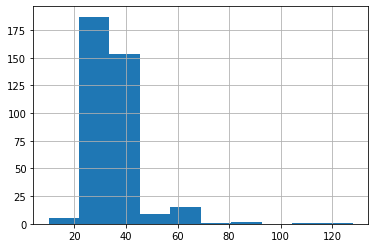

In [14]:
df.credits.hist()

In [15]:
df.corr()

,duration,tuition,world_ranking,gpa,toefl,ielts,credits,gpa_yn,university_tier_ranking,gmat_yn,ielts_yn,toefl_yn,gre_yn,fall_start_yn,spring_start_yn,summer_start_yn,desc_len,tuition_per_month
duration,1.000000,-0.078304,0.072242,-0.111407,-0.023135,-0.024783,-0.043065,0.024355,-0.032523,-0.054910,NaN,NaN,-0.097752,0.021486,-0.060160,0.185338,0.117392,-0.337943
tuition,-0.078304,1.000000,-0.343669,0.053513,0.082767,0.047725,0.029472,0.055936,-0.478571,0.121312,NaN,NaN,0.153220,-0.040453,-0.044328,-0.135050,0.050577,0.912877
world_ranking,0.072242,-0.343669,1.000000,-0.007480,-0.134188,-0.049949,0.043359,-0.018357,0.854375,-0.030762,NaN,NaN,-0.126647,-0.003692,-0.004343,-0.047851,-0.230514,-0.334920
gpa,-0.111407,0.053513,-0.007480,1.000000,-0.025660,0.050305,0.053483,NaN,-0.032844,0.103759,NaN,NaN,0.078770,-0.037656,0.074988,0.022417,-0.058820,0.113057
toefl,-0.023135,0.082767,-0.134188,-0.025660,1.000000,0.558942,-0.014605,0.003219,-0.247513,0.027363,NaN,NaN,0.118139,-0.077789,-0.006881,0.072790,-0.113395,0.114979
ielts,-0.024783,0.047725,-0.049949,0.050305,0.558942,1.000000,0.021206,0.001377,-0.174648,0.060240,NaN,NaN,0.136121,-0.075272,-0.091671,0.067437,-0.031648,0.069773
credits,-0.043065,0.029472,0.043359,0.053483,-0.014605,0.021206,1.000000,0.084290,0.032299,0.071820,NaN,NaN,0.022261,0.069735,-0.025920,-0.039330,-0.040046,0.020824
gpa_yn,0.024355,0.055936,-0.018357,NaN,0.003219,0.001377,0.084290,1.000000,-0.084629,-0.006009,NaN,NaN,0.027458,0.124022,-0.044005,-0.068967,-0.012916,0.036925
university_tier_ranking,-0.032523,-0.478571,0.854375,-0.032844,-0.247513,-0.174648,0.032299,-0.084629,1.000000,-0.009025,NaN,NaN,-0.192698,0.044626,-0.006179,-0.072122,-0.098743,-0.425443
gmat_yn,-0.054910,0.121312,-0.030762,0.103759,0.027363,0.060240,0.071820,-0.006009,-0.009025,1.000000,NaN,NaN,0.441784,-0.051470,-0.068195,-0.062071,0.004609,0.143711


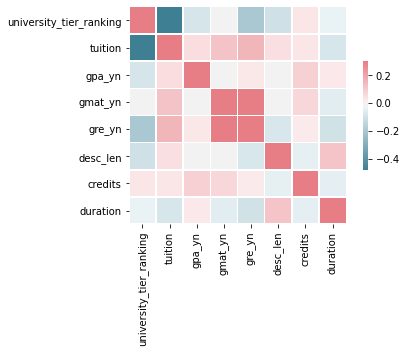

In [16]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['university_tier_ranking', 'tuition', 'gpa_yn', 'gmat_yn', 'gre_yn', 'desc_len', 'credits', 'duration']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [17]:
df_cat1 = df[['tags', 'duration', 'delivered','gpa_yn', 'gre_yn', 'gmat_yn',
       'university_tier_ranking', 'fall_start_yn', 'spring_start_yn', 'summer_start_yn']]

graph for tags: total = 6


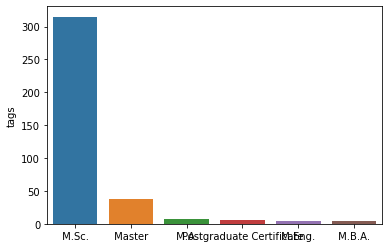

graph for duration: total = 12


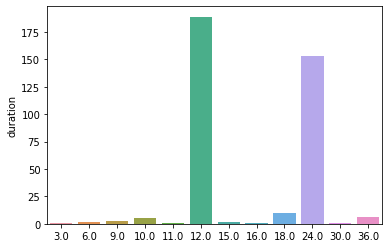

graph for delivered: total = 3


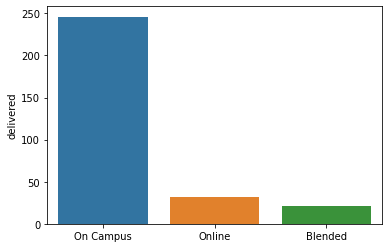

graph for gpa_yn: total = 2


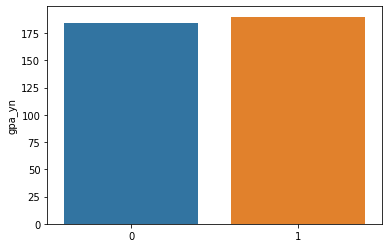

graph for gre_yn: total = 2


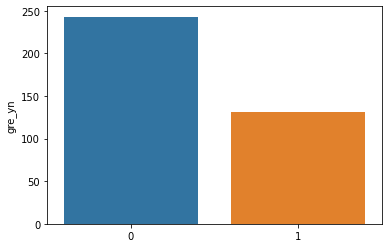

graph for gmat_yn: total = 2


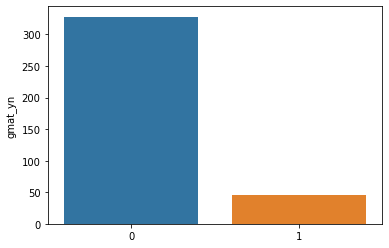

graph for university_tier_ranking: total = 5


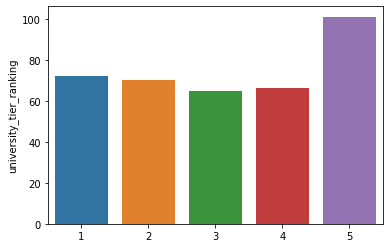

graph for fall_start_yn: total = 2


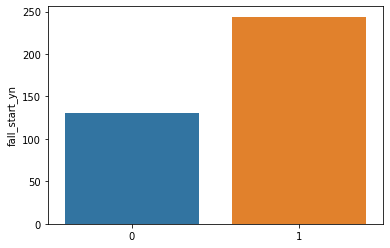

graph for spring_start_yn: total = 2


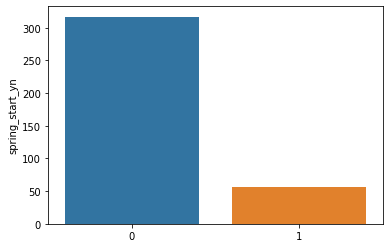

graph for summer_start_yn: total = 2


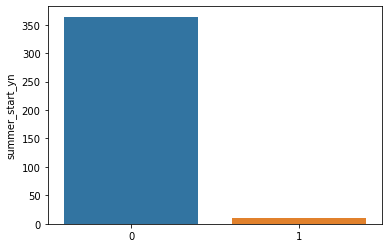

In [24]:
for i in df_cat1.columns:
    cat_num = df_cat1[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels())
    plt.show()

In [19]:
df.columns

Index(['university_name', 'program_name', 'tags', 'duration', 'tuition',
       'start_date', 'description', 'state', 'city', 'world_ranking',
       'disciplines', 'delivered', 'gpa', 'gre', 'toefl', 'ielts', 'credits',
       'gpa_yn', 'university_tier_ranking', 'gmat_yn', 'ielts_yn', 'toefl_yn',
       'gre_yn', 'fall_start_yn', 'spring_start_yn', 'summer_start_yn',
       'desc_len', 'tuition_per_month'],
      dtype='object')

In [20]:
df_cat2 = df[['university_name', 'program_name', 'state', 'city', 'disciplines']]

graph for university_name: total = 20


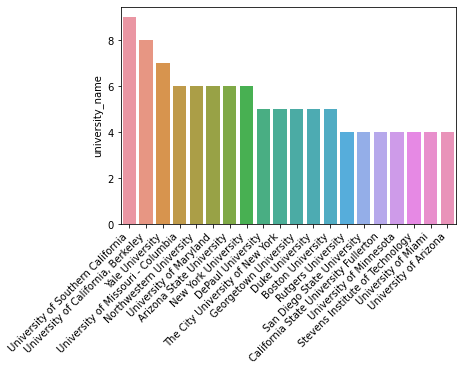

graph for program_name: total = 20


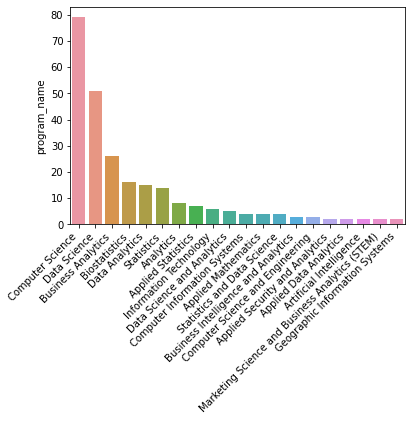

graph for state: total = 20


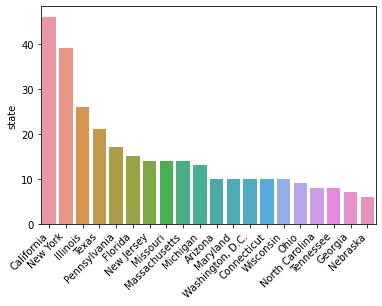

graph for city: total = 20


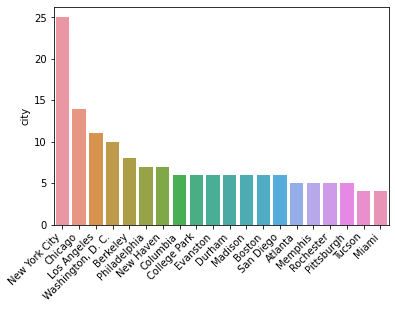

graph for disciplines: total = 20


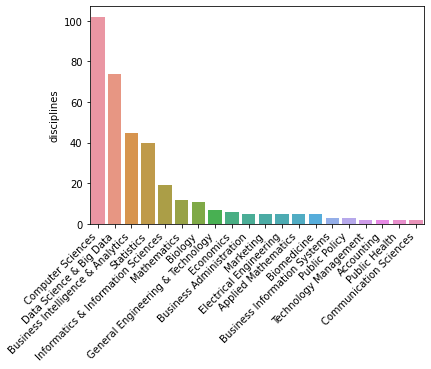

In [21]:
for i in df_cat2.columns:
    cat_num = df_cat2[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, fontweight='light', horizontalalignment='right')
    plt.show()

In [22]:
pd.pivot_table(df, index = 'disciplines', values = 'tuition').sort_values(by='tuition', ascending=False)

,tuition
disciplines,
Master in Business Administration (MBA),81378.000000
Health Sciences,54720.000000
Computer Science & IT,47522.000000
Public Policy,43536.333333
Executive MBA,39581.000000
Biomedicine,39503.200000
Finance,38876.000000
Accounting,29071.500000
Communication Sciences,29038.000000


In [23]:
pd.pivot_table(df, index = ['state'], values = 'tuition').sort_values(by='tuition', ascending=False)

,tuition
state,
Utah,51200.000000
Massachusetts,38310.714286
Minnesota,37132.600000
Kentucky,32564.000000
Iowa,32134.500000
Connecticut,31701.400000
Virginia,30712.750000
Georgia,30465.428571
Arizona,27702.700000


In [26]:
pd.pivot_table(df, index = ['state','disciplines'], values = 'tuition', aggfunc = 'count').sort_values('state', ascending = False)

tuition
state         disciplines                               
Wisconsin     General Engineering & Technology         1
              Data Science & Big Data                  6
              Computer Sciences                        2
              Bio & Biomedical Engineering             1
West Virginia Communication Sciences                   1
...                                                  ...
Arizona       Biomedicine                              1
              Agribusiness                             1
Alabama       General Engineering & Technology         1
              Computer Sciences                        1
              Business Intelligence & Analytics        1

[191 rows x 1 columns]

In [27]:
df.columns

Index(['university_name', 'program_name', 'tags', 'duration', 'tuition',
       'start_date', 'description', 'state', 'city', 'world_ranking',
       'disciplines', 'delivered', 'gpa', 'gre', 'toefl', 'ielts', 'credits',
       'gpa_yn', 'university_tier_ranking', 'gmat_yn', 'ielts_yn', 'toefl_yn',
       'gre_yn', 'fall_start_yn', 'spring_start_yn', 'summer_start_yn',
       'desc_len', 'tuition_per_month'],
      dtype='object')

In [33]:
df_pivots = df[['world_ranking', 'university_tier_ranking', 'disciplines', 'duration', 'delivered', 'tags', 'desc_len', 'gpa', 'gre', 'toefl', 'ielts', 'credits',
       'gpa_yn', 'gmat_yn', 'ielts_yn', 'toefl_yn',
       'gre_yn', 'fall_start_yn', 'spring_start_yn', 'summer_start_yn', 'tuition']]
for i in df_pivots.columns:
    print(i)
    try:
      print(pd.pivot_table(df_pivots,index =i, values = 'tuition').sort_values('tuition', ascending = False))
    except: 
      pass

world_ranking
               tuition
world_ranking         
7.0            73344.0
152.0          64236.0
13.0           58586.0
51.0           54720.0
139.0          51288.0
...                ...
253.0            967.0
1104.0           887.0
1194.0           850.0
671.0            849.0
369.0            627.0

[72 rows x 1 columns]
university_tier_ranking
                              tuition
university_tier_ranking              
2                        30536.128571
1                        28343.194444
3                        14434.184615
4                        13006.257576
5                         7453.792079
disciplines
                                              tuition
disciplines                                          
Master in Business Administration (MBA)  81378.000000
Health Sciences                          54720.000000
Computer Science & IT                    47522.000000
Public Policy                            43536.333333
Executive MBA                         